# Personal Project: Spotify - Song Preference Classification Model

In this project, we use 5 models we know to create a classifier that predicts who will perfer a random song from Spotify.

Our analysis contains the following components:

- Using `Spotify API` and the `Spotipy` libaray to get audio features and information about tracks from our personal playlist on Spotify. (code in **Spotify API.py**)
- The data science lifecycle: data selection and cleaning, EDA, feature engineering, and model selection.
- Using `sklearn` to process data and fit logistic regression, decision tree, random forest, K-nearst Neighbor and  Support Vector Classification (SVC) models.

**Contributors**: *Sophie Lou, Zihan Wen*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
sophie = pd.read_csv('mix.csv')
sophie.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
0,0,Un Año,Un Año,Sebastian Yatra,2019-01-18,164440,74,0.1480,0.771,0.382,0.000000,0.1040,-6.808,0.0514,0.535,94.931,4
1,1,What I'm Leaving For - ACM Presents: Our Country,What I'm Leaving For (ACM Presents: Our Country),Lady A,2020-04-06,205562,44,0.4470,0.534,0.462,0.000000,0.1600,-7.151,0.0261,0.416,148.013,4
2,2,I'll Be There,I'll Be There,Jess Glynne,2018-05-03,193923,71,0.0228,0.623,0.851,0.000000,0.1200,-3.111,0.0409,0.400,100.063,4
3,3,Stolen Dance,Sadnecessary,Milky Chance,2014-06-20,313684,73,0.4270,0.885,0.581,0.000204,0.0759,-8.813,0.0378,0.728,114.016,4
4,4,The Bones - with Hozier,The Bones (with Hozier),Maren Morris,2019-10-04,197298,78,0.2860,0.561,0.597,0.000000,0.0979,-6.000,0.0405,0.355,76.826,4


In [4]:
sophie['release_date'] = pd.to_datetime(sophie['release_date'])

In [5]:
sophie = sophie.drop('Unnamed: 0', axis=1)

In [6]:
s_features = sophie.loc[:,['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness','valence']]
s_features.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,valence
0,0.1480,0.771,0.382,0.000000,0.1040,0.0514,0.535
1,0.4470,0.534,0.462,0.000000,0.1600,0.0261,0.416
2,0.0228,0.623,0.851,0.000000,0.1200,0.0409,0.400
3,0.4270,0.885,0.581,0.000204,0.0759,0.0378,0.728
4,0.2860,0.561,0.597,0.000000,0.0979,0.0405,0.355


In [7]:
zihan = pd.read_csv("spotify_2.csv")
zihan.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
0,0,Better Together,In Between Dreams,Jack Johnson,2005-01-01,207680,72,0.868,0.3080,0.347,0.000020,0.1100,-9.529,0.0536,0.659,110.059,4
1,1,Do You Remember,In Between Dreams,Jack Johnson,2005-01-01,144013,61,0.598,0.7620,0.289,0.000082,0.2620,-11.405,0.0334,0.714,92.035,4
2,2,I Got You,From Here To Now To You,Jack Johnson,2013-01-01,179346,64,0.899,0.6100,0.399,0.000015,0.0923,-6.553,0.0380,0.544,98.067,4
3,3,Over the Rainbow,Alone In Iz World,Israel Kamakawiwo'ole,2001-09-25,211933,71,0.671,0.9120,0.153,0.000055,0.0771,-13.569,0.0404,0.658,85.600,4
4,4,Crush,Crush,Tessa Violet,2018-06-15,216266,66,0.910,0.0302,0.401,0.000159,0.0801,-9.552,0.0855,0.824,135.994,4


In [8]:
zihan['release_date'] = pd.to_datetime(zihan['release_date'])

In [9]:
z_features = zihan.loc[:,['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness','valence']]
z_features.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,valence
0,0.868,0.3080,0.347,0.000020,0.1100,0.0536,0.659
1,0.598,0.7620,0.289,0.000082,0.2620,0.0334,0.714
2,0.899,0.6100,0.399,0.000015,0.0923,0.0380,0.544
3,0.671,0.9120,0.153,0.000055,0.0771,0.0404,0.658
4,0.910,0.0302,0.401,0.000159,0.0801,0.0855,0.824


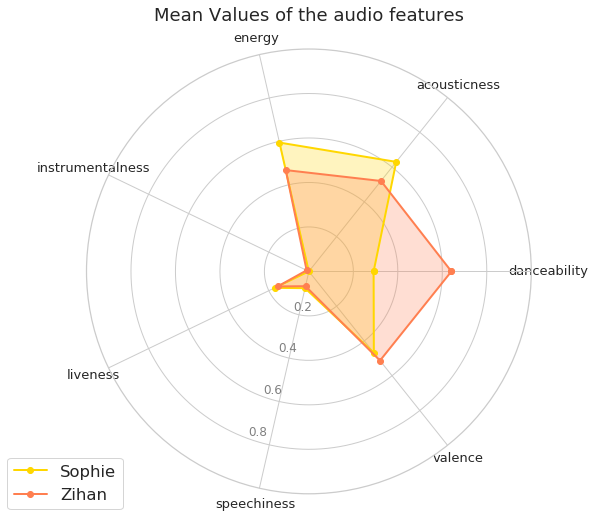

In [10]:
labels= list(s_features)[:]
stats= s_features.mean().tolist()
stats2 = z_features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Sophie", color= 'gold')
ax.fill(angles, stats, alpha=0.25, facecolor='gold')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="gray", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Zihan", color = 'coral')
ax.fill(angles, stats2, alpha=0.25, facecolor='coral' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1));

In [11]:
zihan = zihan.drop('Unnamed: 0', axis=1)

In [12]:
zihan.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
0,Better Together,In Between Dreams,Jack Johnson,2005-01-01,207680,72,0.868,0.3080,0.347,0.000020,0.1100,-9.529,0.0536,0.659,110.059,4
1,Do You Remember,In Between Dreams,Jack Johnson,2005-01-01,144013,61,0.598,0.7620,0.289,0.000082,0.2620,-11.405,0.0334,0.714,92.035,4
2,I Got You,From Here To Now To You,Jack Johnson,2013-01-01,179346,64,0.899,0.6100,0.399,0.000015,0.0923,-6.553,0.0380,0.544,98.067,4
3,Over the Rainbow,Alone In Iz World,Israel Kamakawiwo'ole,2001-09-25,211933,71,0.671,0.9120,0.153,0.000055,0.0771,-13.569,0.0404,0.658,85.600,4
4,Crush,Crush,Tessa Violet,2018-06-15,216266,66,0.910,0.0302,0.401,0.000159,0.0801,-9.552,0.0855,0.824,135.994,4


In [13]:
all_ones = np.ones(zihan.shape[0], dtype = 'int')
zihan['category'] = all_ones
zihan.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,category
0,Better Together,In Between Dreams,Jack Johnson,2005-01-01,207680,72,0.868,0.3080,0.347,0.000020,0.1100,-9.529,0.0536,0.659,110.059,4,1
1,Do You Remember,In Between Dreams,Jack Johnson,2005-01-01,144013,61,0.598,0.7620,0.289,0.000082,0.2620,-11.405,0.0334,0.714,92.035,4,1
2,I Got You,From Here To Now To You,Jack Johnson,2013-01-01,179346,64,0.899,0.6100,0.399,0.000015,0.0923,-6.553,0.0380,0.544,98.067,4,1
3,Over the Rainbow,Alone In Iz World,Israel Kamakawiwo'ole,2001-09-25,211933,71,0.671,0.9120,0.153,0.000055,0.0771,-13.569,0.0404,0.658,85.600,4,1
4,Crush,Crush,Tessa Violet,2018-06-15,216266,66,0.910,0.0302,0.401,0.000159,0.0801,-9.552,0.0855,0.824,135.994,4,1


In [14]:
all_zeros = np.zeros(sophie.shape[0], dtype = 'int')
sophie['category'] = all_zeros
sophie.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,category
0,Un Año,Un Año,Sebastian Yatra,2019-01-18,164440,74,0.1480,0.771,0.382,0.000000,0.1040,-6.808,0.0514,0.535,94.931,4,0
1,What I'm Leaving For - ACM Presents: Our Country,What I'm Leaving For (ACM Presents: Our Country),Lady A,2020-04-06,205562,44,0.4470,0.534,0.462,0.000000,0.1600,-7.151,0.0261,0.416,148.013,4,0
2,I'll Be There,I'll Be There,Jess Glynne,2018-05-03,193923,71,0.0228,0.623,0.851,0.000000,0.1200,-3.111,0.0409,0.400,100.063,4,0
3,Stolen Dance,Sadnecessary,Milky Chance,2014-06-20,313684,73,0.4270,0.885,0.581,0.000204,0.0759,-8.813,0.0378,0.728,114.016,4,0
4,The Bones - with Hozier,The Bones (with Hozier),Maren Morris,2019-10-04,197298,78,0.2860,0.561,0.597,0.000000,0.0979,-6.000,0.0405,0.355,76.826,4,0


In [15]:
spotify = pd.concat([sophie, zihan])
spotify['category'].unique()

array([0, 1])

In [16]:
#feature engineering
year = spotify['release_date'].dt.year
spotify['release_year'] = year 
spotify.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,category,release_year
0,Un Año,Un Año,Sebastian Yatra,2019-01-18,164440,74,0.1480,0.771,0.382,0.000000,0.1040,-6.808,0.0514,0.535,94.931,4,0,2019
1,What I'm Leaving For - ACM Presents: Our Country,What I'm Leaving For (ACM Presents: Our Country),Lady A,2020-04-06,205562,44,0.4470,0.534,0.462,0.000000,0.1600,-7.151,0.0261,0.416,148.013,4,0,2020
2,I'll Be There,I'll Be There,Jess Glynne,2018-05-03,193923,71,0.0228,0.623,0.851,0.000000,0.1200,-3.111,0.0409,0.400,100.063,4,0,2018
3,Stolen Dance,Sadnecessary,Milky Chance,2014-06-20,313684,73,0.4270,0.885,0.581,0.000204,0.0759,-8.813,0.0378,0.728,114.016,4,0,2014
4,The Bones - with Hozier,The Bones (with Hozier),Maren Morris,2019-10-04,197298,78,0.2860,0.561,0.597,0.000000,0.0979,-6.000,0.0405,0.355,76.826,4,0,2019


In [17]:
info = spotify.drop(["name", "album", "artist", "release_date"], axis=1)
info.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,category,release_year
0,164440,74,0.1480,0.771,0.382,0.000000,0.1040,-6.808,0.0514,0.535,94.931,4,0,2019
1,205562,44,0.4470,0.534,0.462,0.000000,0.1600,-7.151,0.0261,0.416,148.013,4,0,2020
2,193923,71,0.0228,0.623,0.851,0.000000,0.1200,-3.111,0.0409,0.400,100.063,4,0,2018
3,313684,73,0.4270,0.885,0.581,0.000204,0.0759,-8.813,0.0378,0.728,114.016,4,0,2014
4,197298,78,0.2860,0.561,0.597,0.000000,0.0979,-6.000,0.0405,0.355,76.826,4,0,2019


In [18]:
info_label = info[['category']]
info_feature = info.drop('category', axis=1)

In [19]:
info_feature.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_year
0,164440,74,0.1480,0.771,0.382,0.000000,0.1040,-6.808,0.0514,0.535,94.931,4,2019
1,205562,44,0.4470,0.534,0.462,0.000000,0.1600,-7.151,0.0261,0.416,148.013,4,2020
2,193923,71,0.0228,0.623,0.851,0.000000,0.1200,-3.111,0.0409,0.400,100.063,4,2018
3,313684,73,0.4270,0.885,0.581,0.000204,0.0759,-8.813,0.0378,0.728,114.016,4,2014
4,197298,78,0.2860,0.561,0.597,0.000000,0.0979,-6.000,0.0405,0.355,76.826,4,2019


In [20]:
info_label.head()

,category
0,0
1,0
2,0
3,0
4,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(info_feature)

In [22]:
# Create a correlation matrix
corr_metrics = info_feature.corr()
corr_metrics.style.background_gradient()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_year
length,1,0.0887322,-0.0779498,-0.0710096,0.0943565,0.25584,-0.0558172,0.0480141,-0.107624,-0.240685,0.0617171,0.00528209,-0.0123723
popularity,0.0887322,1,-0.217264,-0.00507891,0.241476,-0.205208,0.00767549,0.313096,0.0394769,-0.0849106,-0.0271305,0.144438,0.253451
danceability,-0.0779498,-0.217264,1,-0.313381,-0.436527,0.0110357,-0.104831,-0.332993,-0.0493424,0.12982,-0.156106,-0.135088,-0.204804
acousticness,-0.0710096,-0.00507891,-0.313381,1,-0.402082,0.0455993,0.0439407,-0.415771,0.0294208,-0.173854,-0.0903001,-0.083449,0.048656
energy,0.0943565,0.241476,-0.436527,-0.402082,1,-0.0725021,0.079292,0.811894,0.132714,0.224207,0.0677236,0.232644,0.204299
instrumentalness,0.25584,-0.205208,0.0110357,0.0455993,-0.0725021,1,0.0382638,-0.256069,-0.04974,0.0273218,-0.00437148,0.0148679,-0.00590299
liveness,-0.0558172,0.00767549,-0.104831,0.0439407,0.079292,0.0382638,1,-0.0572118,0.19207,-0.0995394,-0.0284841,-0.0429697,0.0589934
loudness,0.0480141,0.313096,-0.332993,-0.415771,0.811894,-0.256069,-0.0572118,1,-0.0387437,0.188554,0.0884765,0.267874,0.370656
speechiness,-0.107624,0.0394769,-0.0493424,0.0294208,0.132714,-0.04974,0.19207,-0.0387437,1,-0.0528328,0.0181465,-0.0669233,0.121799
valence,-0.240685,-0.0849106,0.12982,-0.173854,0.224207,0.0273218,-0.0995394,0.188554,-0.0528328,1,0.000923057,0.0459794,-0.228531


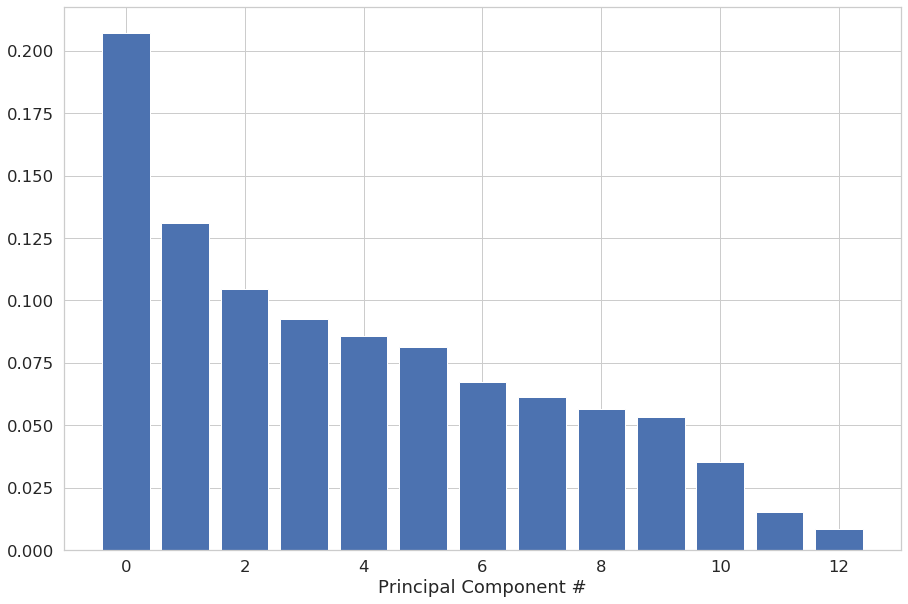

In [23]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #');

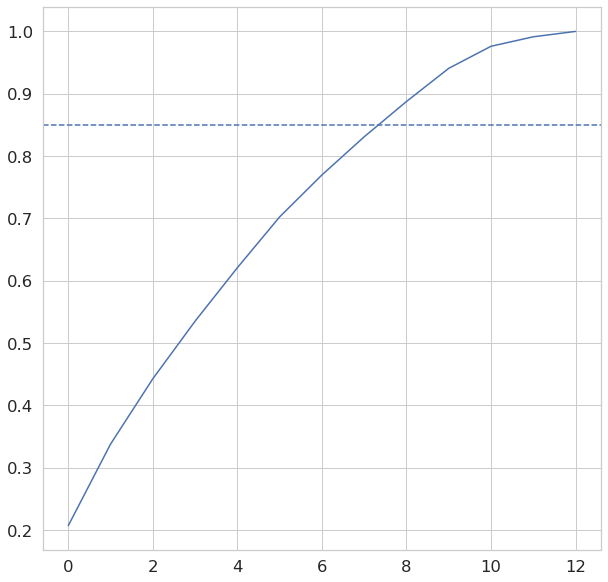

In [24]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(pca.n_components_),cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

# choose the n_components where about 85% of our variance can be explained
n_components = 9

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [25]:
len(pca_projection[0])

9

In [26]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Split our data
X_train, X_test, y_train, y_test = train_test_split(pca_projection,info_label,test_size=0.2)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

**Logistic Regression Model**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

training_accuracy = logreg.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)
testing_accuracy = logreg.score(X_test, y_test)
print("Testing Accuracy: ", testing_accuracy)

[[16  4]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.81      0.85      0.83        20

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

Training Accuracy:  0.825
Testing Accuracy:  0.825


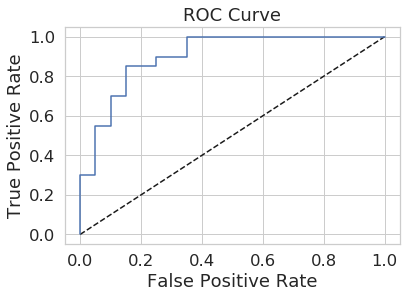

In [31]:
from sklearn.metrics import roc_curve 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [32]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("mean cross-validation AUC scores: {}".format(cv_auc.mean()))

AUC: 0.9025
AUC scores computed using 5-fold cross-validation: [0.8828125  0.96875    0.9140625  0.8984375  0.87890625]
mean cross-validation AUC scores: 0.90859375


In [33]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.91328125


In [121]:
logreg_param = [logreg_cv.best_params_.get('C')]
logreg_param

[0.4393970560760795]

In [82]:
models = {}
models['Logistic Regression'] = logreg_cv.best_score_
print(models)

{'Logistic Regression': 0.91328125}


In [83]:
best_logreg = LogisticRegression(C=logreg_param[0])
best_logreg.fit(X_train, y_train)

LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
best_models = {}
best_models['Logistic Regression'] = best_logreg
print(best_models)

{'Logistic Regression': LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)}


**Decision Tree Model**

In [35]:
# Create the classifier: logreg
tree = DecisionTreeClassifier()

# Fit the classifier to the training data
tree.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = tree.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

training_accuracy = tree.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)
testing_accuracy = tree.score(X_test, y_test)
print("Testing Accuracy: ", testing_accuracy)

[[18  2]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.88      0.75      0.81        20

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

Training Accuracy:  1.0
Testing Accuracy:  0.825


In [36]:
dp = tree.tree_.max_depth
dp

7

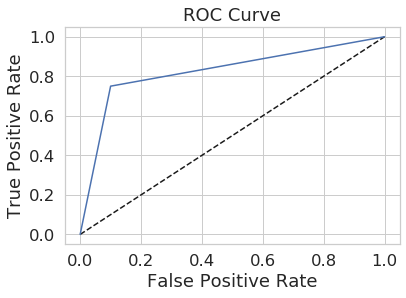

In [37]:
from sklearn.metrics import roc_curve 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = tree.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [38]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("mean cross-validation AUC scores: {}".format(cv_auc.mean()))

AUC: 0.825
AUC scores computed using 5-fold cross-validation: [0.71875 0.78125 0.75    0.84375 0.84375]
mean cross-validation AUC scores: 0.7875


In [39]:
# Setup the hyperparameter grid
param_dist = {"max_depth": np.arange(1, dp+1),
              "max_features": np.arange(1,10),
              "min_samples_leaf": np.arange(1, 10),
              "criterion": ["gini", "entropy"]}

# Instantiate the GridSearchCV object: logreg_cv
tree_cv = GridSearchCV(tree, param_dist, cv=5, scoring='roc_auc')

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Tree Regression Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Tree Regression Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 9}
Best score is 0.926171875


In [119]:
tree_param = [tree_cv.best_params_.get('criterion'), tree_cv.best_params_.get('max_depth'), 
                tree_cv.best_params_.get('max_features'), tree_cv.best_params_.get('min_samples_leaf')]
tree_param

['gini', 7, 9, 9]

In [86]:
models['Decision Tree'] = tree_cv.best_score_
print(models)

{'Logistic Regression': 0.91328125, 'Decision Tree': 0.926171875}


In [87]:
best_tree = DecisionTreeClassifier(criterion=tree_param[0], max_depth=tree_param[1], max_features=tree_param[2], 
                                   min_samples_leaf=tree_param[3])
best_tree.fit(X_train, y_train)

best_models['Decision Tree'] = best_tree
print(best_models)

{'Logistic Regression': LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')}


**Random Forest Model**

In [41]:
# Create the classifier: logreg
forest = RandomForestClassifier()

# Fit the classifier to the training data
forest.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = forest.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

training_accuracy = forest.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)
testing_accuracy = forest.score(X_test, y_test)
print("Testing Accuracy: ", testing_accuracy)

[[18  2]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

Training Accuracy:  1.0
Testing Accuracy:  0.9


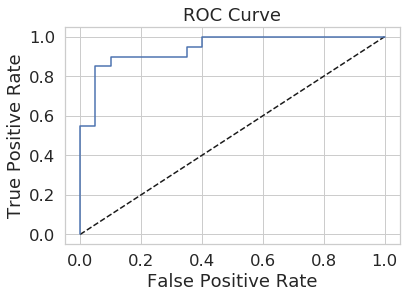

In [42]:
from sklearn.metrics import roc_curve 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = forest.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [43]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(forest, X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("mean cross-validation AUC scores: {}".format(cv_auc.mean()))

AUC: 0.9424999999999999
AUC scores computed using 5-fold cross-validation: [0.8828125  0.91992188 0.921875   0.984375   0.94335938]
mean cross-validation AUC scores: 0.93046875


In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the hyperparameter grid
param_forest = {"max_depth": np.arange(1, 32),
              "max_features": np.arange(1,10),
              "min_samples_leaf": np.arange(1, 10),
              "n_estimators": np.arange(100,500,100),
              "criterion": ["gini", "entropy"]}

# Instantiate the GridSearchCV object: logreg_cv
forest_cv = RandomizedSearchCV(forest, param_forest, cv=5, scoring='roc_auc')

# Fit it to the data
forest_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Tree Regression Parameters: {}".format(forest_cv.best_params_)) 
print("Best score is {}".format(forest_cv.best_score_))

Tuned Tree Regression Parameters: {'n_estimators': 200, 'min_samples_leaf': 6, 'max_features': 9, 'max_depth': 8, 'criterion': 'entropy'}
Best score is 0.94375


In [118]:
forest_param = [forest_cv.best_params_.get('n_estimators'), forest_cv.best_params_.get('min_samples_leaf'), 
                forest_cv.best_params_.get('max_features'), forest_cv.best_params_.get('max_depth'),
               forest_cv.best_params_.get('criterion')]
forest_param

[200, 6, 9, 8, 'entropy']

In [88]:
models['Random forest'] = forest_cv.best_score_
print(models)

{'Logistic Regression': 0.91328125, 'Decision Tree': 0.926171875, 'Random forest': 0.94375}


In [89]:
best_forest =  RandomForestClassifier(n_estimators=forest_param[0], min_samples_leaf=forest_param[1], 
                                      max_features=forest_param[2], max_depth=forest_param[3], 
                                      criterion=forest_param[4])
best_forest.fit(X_train, y_train)

best_models['Random Forest'] = best_forest
print(best_models)

{'Logistic Regression': LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'Random Forest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=9,
                       max_leaf_

**K-nearest Neighbor Model**

In [49]:
# Create the classifier: logreg
KNN = KNeighborsClassifier()

# Fit the classifier to the training data
KNN.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = KNN.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

training_accuracy = KNN.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)
testing_accuracy = KNN.score(X_test, y_test)
print("Testing Accuracy: ", testing_accuracy)

[[17  3]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.86      0.95      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

Training Accuracy:  0.925
Testing Accuracy:  0.9


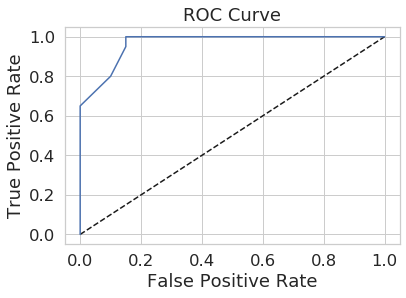

In [50]:
from sklearn.metrics import roc_curve 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = KNN.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [51]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(KNN, X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("mean cross-validation AUC scores: {}".format(cv_auc.mean()))

AUC: 0.96625
AUC scores computed using 5-fold cross-validation: [0.91601562 0.94921875 0.98242188 0.9921875  0.94726562]
mean cross-validation AUC scores: 0.957421875


In [73]:
# Setup the hyperparameter grid
param_KNN = {"n_neighbors": np.arange(1, 20),
              "weights": ['uniform','distance']}

# Instantiate the GridSearchCV object: logreg_cv
KNN_cv = GridSearchCV(KNN, param_KNN, cv=5, scoring='roc_auc')

# Fit it to the data
KNN_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(KNN_cv.best_params_)) 
print("Best score is {}".format(KNN_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 12, 'weights': 'distance'}
Best score is 0.97265625


In [117]:
KNN_param = [KNN_cv.best_params_.get('n_neighbors'), KNN_cv.best_params_.get('weights')]
KNN_param

[12, 'distance']

In [90]:
models['KNN'] = KNN_cv.best_score_
print(models)

{'Logistic Regression': 0.91328125, 'Decision Tree': 0.926171875, 'Random forest': 0.94375, 'KNN': 0.97265625}


In [91]:
best_KNN = KNeighborsClassifier(n_neighbors=KNN_param[0], weights=KNN_param[1])
best_KNN.fit(X_train, y_train)

best_models['KNN'] = best_KNN
print(best_models)

{'Logistic Regression': LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'Random Forest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=9,
                       max_leaf_

**Support Vector Machine (SVM)**

In [56]:
# Create the classifier: logreg
SVM = SVC()

# Fit the classifier to the training data
SVM.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = SVM.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

training_accuracy = SVM.score(X_train, y_train)
print("Training Accuracy: ", training_accuracy)
testing_accuracy = SVM.score(X_test, y_test)
print("Testing Accuracy: ", testing_accuracy)

[[16  4]
 [ 2 18]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.82      0.90      0.86        20

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40

Training Accuracy:  0.93125
Testing Accuracy:  0.85


In [60]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(KNN, X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("mean cross-validation AUC scores: {}".format(cv_auc.mean()))

AUC scores computed using 5-fold cross-validation: [0.91601562 0.94921875 0.98242188 0.9921875  0.94726562]
mean cross-validation AUC scores: 0.957421875


In [75]:
# Setup the hyperparameter grid
param_SVM = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# Instantiate the GridSearchCV object: logreg_cv
SVM_cv = GridSearchCV(SVM, param_SVM, cv=5, scoring='roc_auc')

# Fit it to the data
SVM_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned SVM Parameters: {}".format(SVM_cv.best_params_)) 
print("Best score is {}".format(SVM_cv.best_score_))

Tuned SVM Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score is 0.97109375


In [116]:
SVM_param = [SVM_cv.best_params_.get('C'), SVM_cv.best_params_.get('gamma'), SVM_cv.best_params_.get('kernel')]
SVM_param

[10, 0.1, 'rbf']

In [92]:
models['SVC'] = SVM_cv.best_score_
print(models)

{'Logistic Regression': 0.91328125, 'Decision Tree': 0.926171875, 'Random forest': 0.94375, 'KNN': 0.97265625, 'SVC': 0.97109375}


In [93]:
best_SVC = SVC(C=SVM_param[0], gamma=SVM_param[1], kernel=SVM_param[2])
best_SVC.fit(X_train, y_train)

best_models['SVC'] = best_SVC
print(best_models)

{'Logistic Regression': LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'Random Forest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=9,
                       max_leaf_

In [78]:
sort_dict = sorted(models.items(), key=lambda x: x[1], reverse=True)

for i in sort_dict:
    print(i[0], i[1])

KNN 0.97265625
SVC 0.97109375
Random forest 0.94375
Decision Tree 0.926171875
Logistic Regression 0.91328125


**Visualization of all the models**

In [122]:
def compare_models(models):
    # Compute the training accuracy for each model
    #training_score = [model.score(X_train, y_train) for model in best_models.values()]
    # Compute the cross validation error for each model
    validation_roc_auc_score = [score for score in models.values()]
    # Compute the test error for each model (don't do this!)
    #test_rmse = [rmse(te['mpg'], model.predict(te)) for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
        #go.Bar(x = names, y = training_score, name="Training score"),
        go.Bar(x = names, y = validation_roc_auc_score, name="CV score"),
        #go.Bar(x = names, y = test_rmse, name="Test RMSE", opacity=.3)
    ])
    return fig

In [123]:
import plotly.graph_objects as go
fig = compare_models(models)
fig.update_yaxes(range=[0.8,1], title="AUC")

## Final Optimal model performance
Since KNN achieves the best auc score on training set, let's choose KNN as our final model.

In [104]:
#final optimal model and its auc score
y_pred_prob = best_KNN.predict_proba(X_test)[:,1]
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.98
